In [1]:
import pandas as pd
import geopandas as gpd

import dataloader
import analyze_population
import analyze_category
import fire_heatmaps
import analyze_correlation
import trends

## Load the data

In [2]:
fireDataFrame = dataloader.load(range(2007, 2020))
pop_df = pd.read_excel('./data/San Diego Population 2006 2019.xlsx')

## Number of call categories

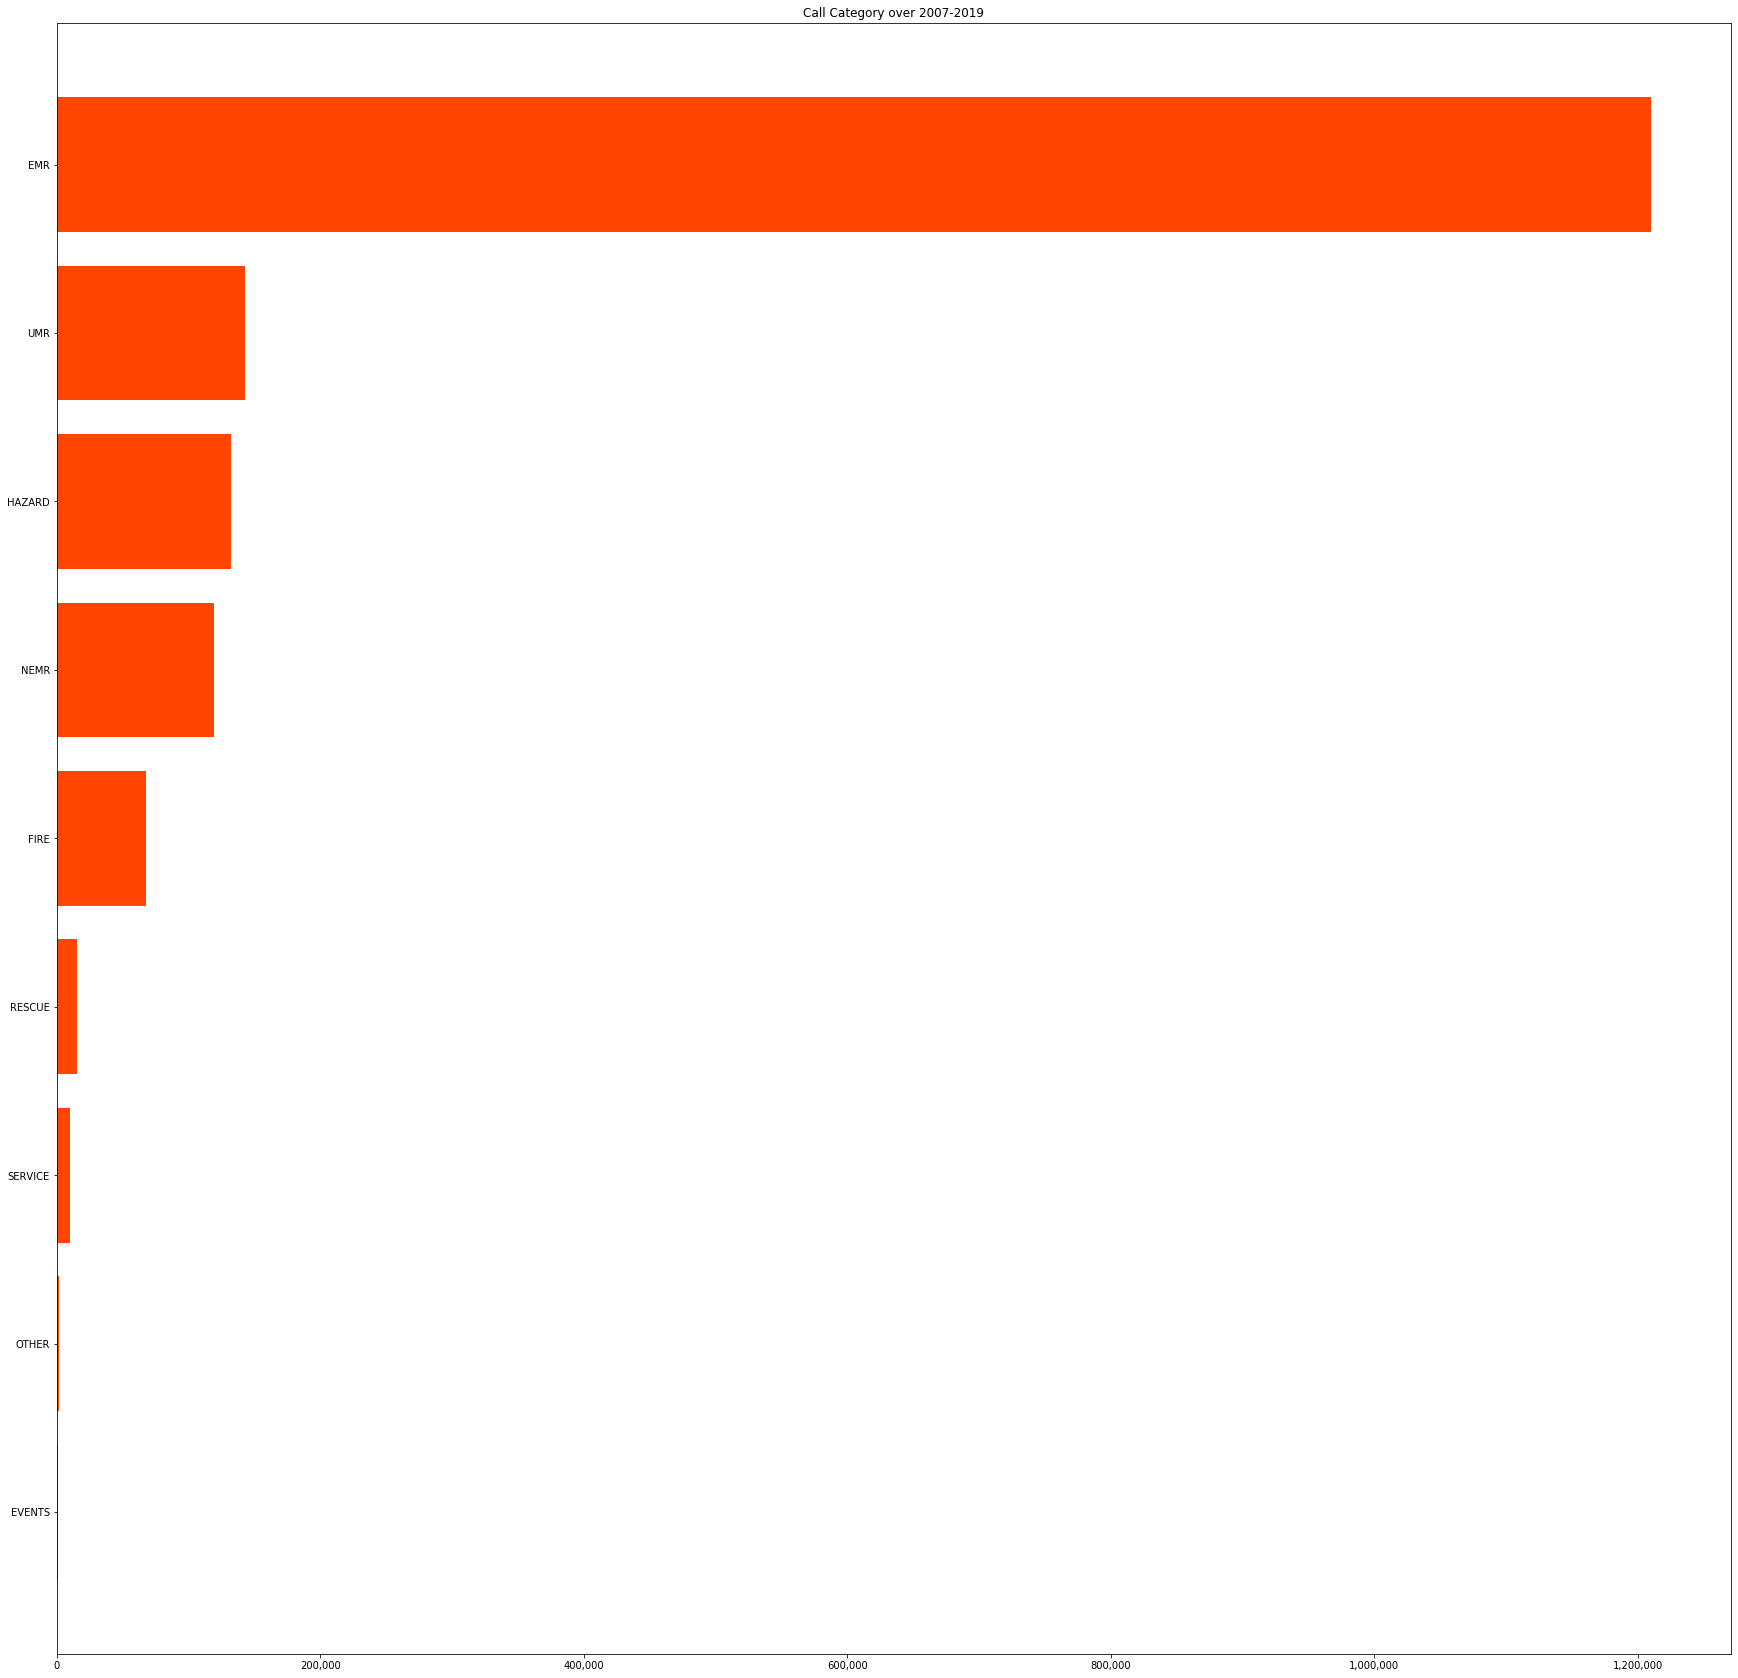

In [3]:
years = range(2007,2020)
analyze_category.plot_category_over_years(fireDataFrame, years)

## Year-to-year trend

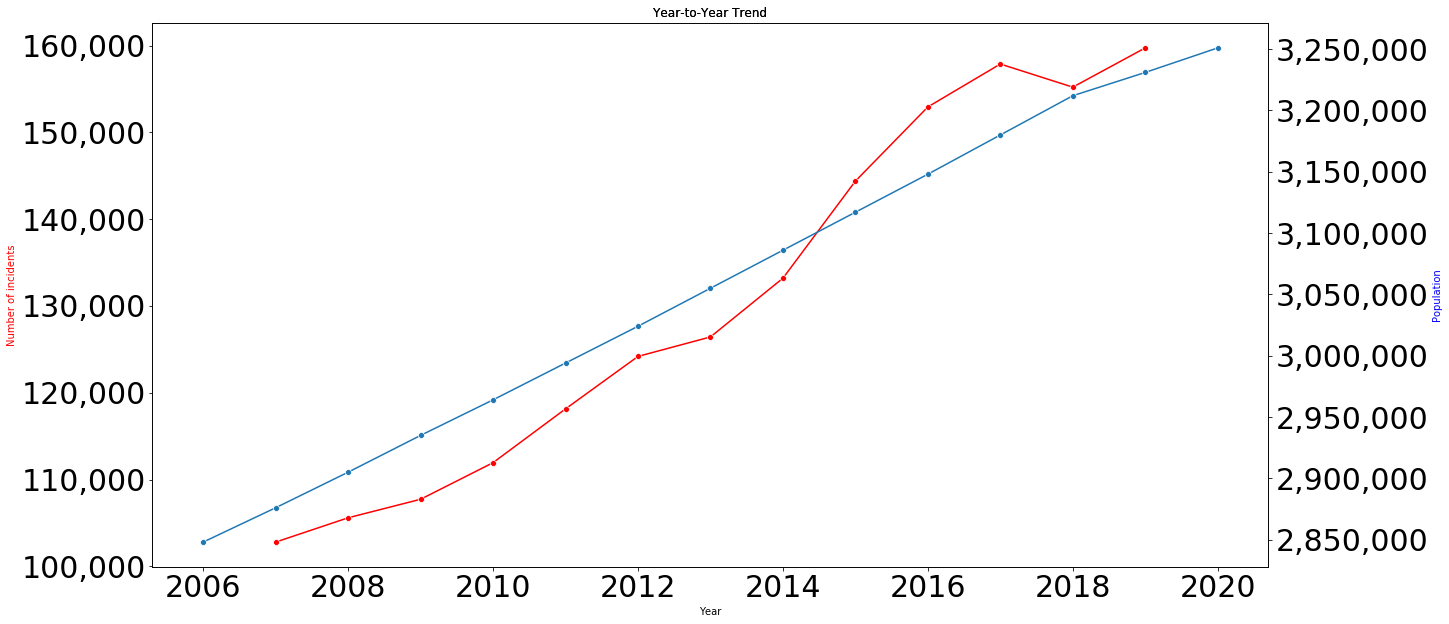

In [4]:
trends.yearly_trends(fireDataFrame, pop_df)

## Month-to-month trend

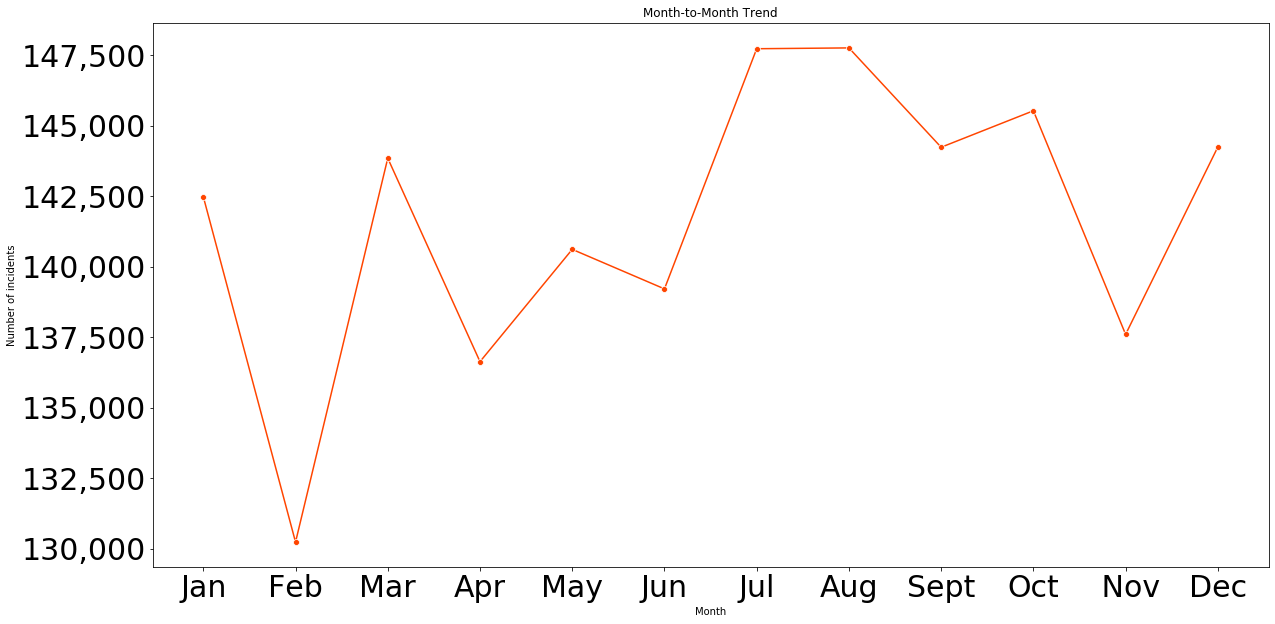

In [5]:
trends.monthly_trends(fireDataFrame)

## Time and number of incidents correlation

In [ ]:
analyze_correlation.plot_correlation_time_incidents(fireDataFrame)

## Heatmap of incidents

In [ ]:
with open('./data/SanDiego_zipcode.txt', 'r') as f:
    zips = f.readline().strip().replace(',', '').split()
county = gpd.read_file('./data/san_diego_zip_codes.geojson')
san_diego = county[county['zip'].isin(zips)]
san_diego = san_diego.reset_index()
san_diego.rename(columns = {'zip':'address_zip'}, inplace = True)

years = range(2010,2011)
fire_heatmaps.plot_fire_heatmap(san_diego, years, True)

## Heatmap of populations

In [ ]:
analyze_population.plot_population_heatmap(san_diego, years)

## Zip code and month correlation

In [ ]:
analyze_correlation.plot_correlation_month_zip(fireDataFrame)